In [ ]:
# pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS


from sklearn.ensemble import (GradientBoostingRegressor as GBR)# for boosting regressor



In [ ]:
data = load_data('Caravan')
data.columns, data.shape

(Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
        'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
        'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
        'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
        'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
        'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
        'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
        'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
        'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
        'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
        'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
        'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
        'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
        'APLEZI

In [ ]:
set(data.Purchase)

{'No', 'Yes'}

In [ ]:
data['Purchase'] = data.Purchase.replace({'No' : 0 , 'Yes' :  1})
data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_model = MS(data.columns.drop('Purchase') , intercept=False)
X = data_model.fit_transform(data)
feature_names = list(X.columns)
X = np.asarray(X) # decision trees run without upper column text fast
y = data['Purchase']
y,X


(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5817    0
 5818    0
 5819    1
 5820    0
 5821    0
 Name: Purchase, Length: 5822, dtype: int64,
 array([[33,  1,  3, ...,  0,  0,  0],
        [37,  1,  2, ...,  0,  0,  0],
        [37,  1,  2, ...,  0,  0,  0],
        ...,
        [33,  1,  3, ...,  0,  0,  0],
        [34,  1,  3, ...,  0,  0,  0],
        [33,  1,  3, ...,  0,  0,  0]]))

In [ ]:
X_train,X_test,y_train,y_test = skm.train_test_split(X,y , test_size=0.3 , shuffle=True)
X_train

array([[20,  1,  3, ...,  0,  0,  0],
       [12,  1,  4, ...,  1,  0,  0],
       [36,  1,  2, ...,  0,  0,  0],
       ...,
       [ 1,  1,  3, ...,  0,  0,  0],
       [38,  1,  2, ...,  0,  0,  0],
       [ 8,  1,  3, ...,  0,  0,  0]])

# boosting

In [ ]:
boost_model = GBR(n_estimators=1000, # 1000 no of diff trees we are adding
                  learning_rate=0.01, # as provided in assingment
                  max_depth=3) # depth each time
boost_model.fit(X_train,y_train)



# testing on test data as mentioned in assingment
pred5 = boost_model.predict(X_test)
mse = np.mean((y_test - pred5)**2) # mse
mse

0.05816119960161669

In [ ]:
sorted(boost_model.feature_importances_ , reverse=True) # to check for highest values

[0.1523626357393024,
 0.08068038577500476,
 0.06593541360717668,
 0.04448488905042513,
 0.03897164851158166,
 0.03408485937635595,
 0.0321766965158943,
 0.0304420972263139,
 0.027433940131524805,
 0.026433507784240865,
 0.023672719020689275,
 0.022361022701298718,
 0.02090373898204565,
 0.01988206288872739,
 0.01939715403292845,
 0.017711540731209344,
 0.01755934918866495,
 0.01650391018196498,
 0.015709799344203645,
 0.014278510359465259,
 0.014050587760973477,
 0.013981625961199482,
 0.012695479841984028,
 0.012457300743420524,
 0.011729699343737406,
 0.010238878864180677,
 0.009991136298949065,
 0.009904573339064034,
 0.009630672870937985,
 0.00960242256238478,
 0.00950369531864872,
 0.009287517416992195,
 0.008674260575134048,
 0.008302747920103819,
 0.00787755429818918,
 0.007180799014480516,
 0.007064270083907202,
 0.0061766353075698045,
 0.005870824270840365,
 0.005856289780912005,
 0.005757162301429797,
 0.005692003616007762,
 0.005297426608030223,
 0.005114158347242358,
 0.005

In [ ]:
cols = data.columns[:-1]
# len(boost_model.feature_importances_)
mappings = zip(cols,boost_model.feature_importances_)
mappings = list(mappings)
mappings

[('MOSTYPE', 0.04448488905042513),
 ('MAANTHUI', 0.0004806777518897745),
 ('MGEMOMV', 0.017711540731209344),
 ('MGEMLEEF', 0.008302747920103819),
 ('MOSHOOFD', 0.026433507784240865),
 ('MGODRK', 0.005757162301429797),
 ('MGODPR', 0.0029607273698136903),
 ('MGODOV', 0.013981625961199482),
 ('MGODGE', 0.012695479841984028),
 ('MRELGE', 0.0007535486306196032),
 ('MRELSA', 0.003814892427586395),
 ('MRELOV', 0.0005441586643866854),
 ('MFALLEEN', 0.00034984302066365147),
 ('MFGEKIND', 0.004728710639469532),
 ('MFWEKIND', 0.023672719020689275),
 ('MOPLHOOG', 0.014050587760973477),
 ('MOPLMIDD', 0.01650391018196498),
 ('MOPLLAAG', 0.0304420972263139),
 ('MBERHOOG', 0.014278510359465259),
 ('MBERZELF', 0.00787755429818918),
 ('MBERBOER', 0.012457300743420524),
 ('MBERMIDD', 0.03408485937635595),
 ('MBERARBG', 0.022361022701298718),
 ('MBERARBO', 0.00950369531864872),
 ('MSKA', 0.005114158347242358),
 ('MSKB1', 0.007064270083907202),
 ('MSKB2', 0.003342873240046759),
 ('MSKC', 0.0052974266080302

In [ ]:
max(mappings, key=lambda x : x[1]) # printing max

('PPERSAUT', 0.1523626357393024)

In [ ]:
pred5 = [1 if x > 0.5 else 0 for x in pred5]
set(pred5)

{0, 1}

In [ ]:
confusion_table(pred5,y_test) # visulization

Truth,0,1
Predicted,,
0,1630,113
1,2,2


In [ ]:
sum(data['Purchase'] == 0) # just for confirmation

5474

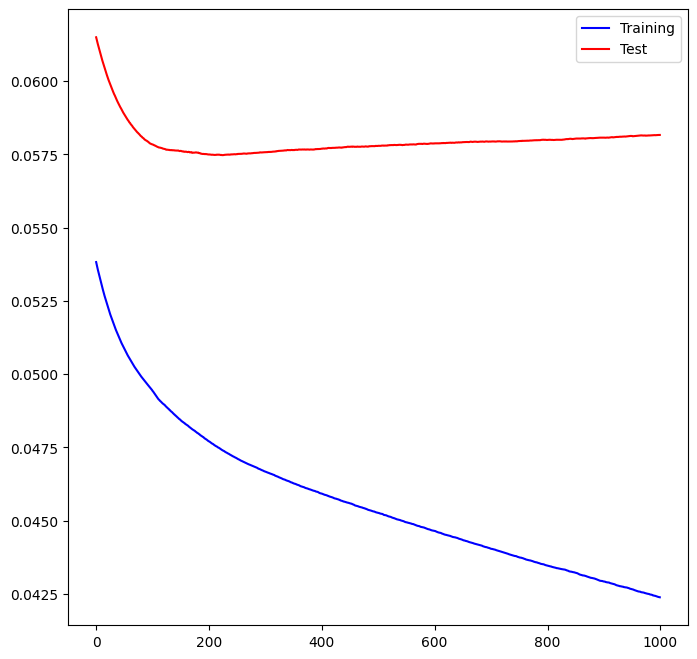

In [ ]:
# code from the mail prof sent yesterday
test_error = np.zeros_like(boost_model.train_score_) # returns the training error

# calculate the testing error
for idx, y_ in enumerate(boost_model.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

# visualize the training and testing error
plot_idx = np.arange(boost_model.train_score_.shape[0])
ax = plt.subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_model.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

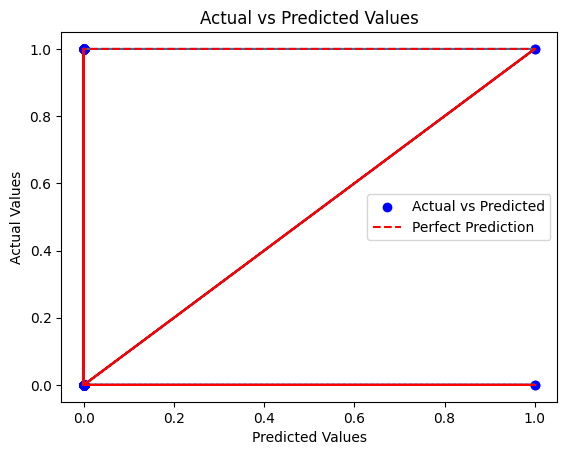

In [ ]:
plt.plot(pred5,y_test)

plt.scatter(pred5,y_test, color='blue', label='Actual vs Predicted')
plt.plot(pred5,y_test, color='red', linestyle='--', label='Perfect Prediction')

# Set labels and title
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()
